In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# **EDA**

In [2]:
data = pd.read_csv('ai4i2020.csv')

In [3]:
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [4]:
data_desc = data.describe().T
data_desc['nunique'] = data.nunique()
data_desc['null'] = data.isna().sum()
data_desc['dtype'] = data.dtypes
data_desc

,count,mean,std,min,25%,50%,75%,max,nunique,null,dtype
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0,10000,0,int64
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5,93,0,float64
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8,82,0,float64
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0,941,0,int64
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6,577,0,float64
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0,246,0,int64
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0,2,0,int64
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0,2,0,int64
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0,2,0,int64
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0,2,0,int64


array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Machine failure'}>,
        <Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>],
       [<Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

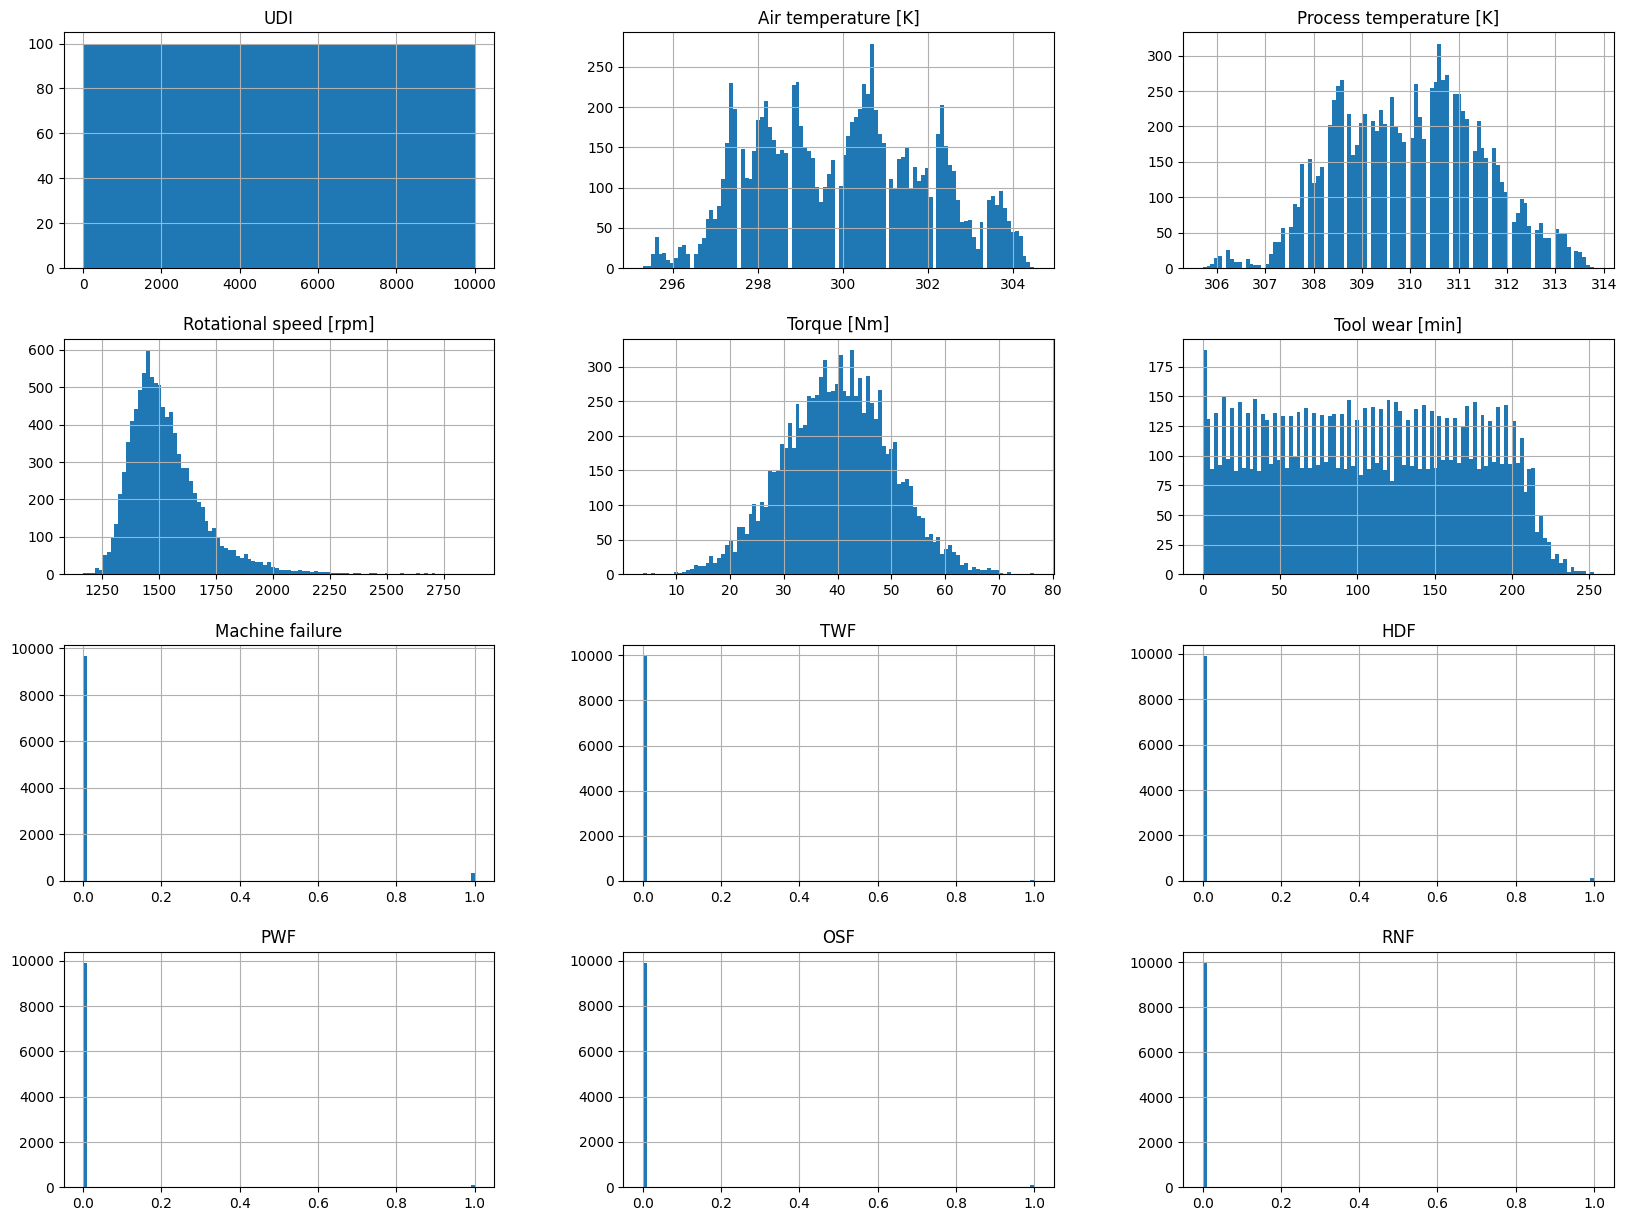

In [5]:
data.hist(bins=100, figsize=(20, 15))

# **Data Split**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Features and target
X = data.drop(columns=['UDI', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = data['TWF']

# Identify categorical and numerical columns
categorical_features = ['Product ID', 'Type']
numerical_features = X.columns.difference(categorical_features)

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Preprocessing and train-test split
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 10008), (2000, 10008), (8000,), (2000,))

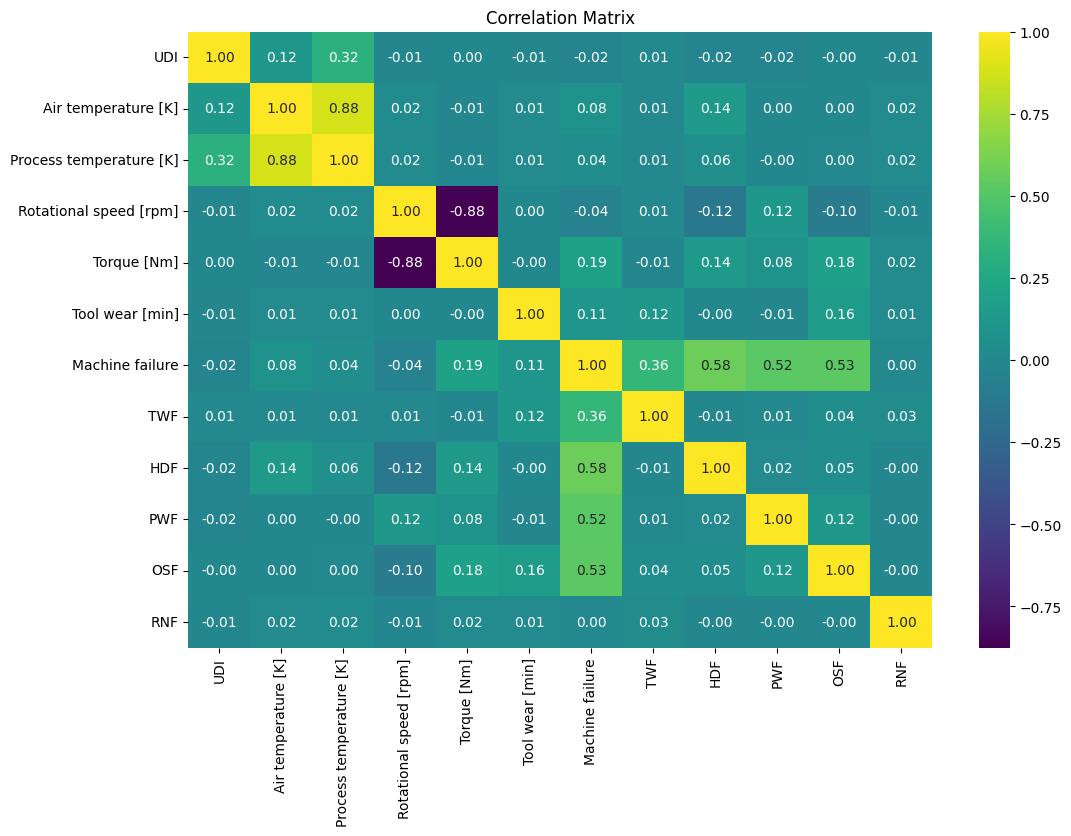

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9945
Confusion Matrix:
[[1989    0]
 [  11    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000



Hasilnya aneh, akurasi tinggi tapi confusion matrix rendah.

# **Apply Oversampling**

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the resampled data
model_res = LogisticRegression(max_iter=1000, random_state=42)
model_res.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_res = model_res.predict(X_test)

# Evaluate the resampled model
accuracy_res = accuracy_score(y_test, y_pred_res)
conf_matrix_res = confusion_matrix(y_test, y_pred_res)
class_report_res = classification_report(y_test, y_pred_res)

print(f'Accuracy: {accuracy_res}')
print(f'Confusion Matrix:\n{conf_matrix_res}')
print(f'Classification Report:\n{class_report_res}')

Accuracy: 0.986
Confusion Matrix:
[[1971   18]
 [  10    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1989
           1       0.05      0.09      0.07        11

    accuracy                           0.99      2000
   macro avg       0.52      0.54      0.53      2000
weighted avg       0.99      0.99      0.99      2000



Setelah di oversampling tetap sama, tidak ada perubahan signifikan.